<a href="https://colab.research.google.com/github/Rakin7/Pytorch/blob/main/Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.9
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.16
albumentations                     1.4.15
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.19.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.7.0.32.46
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread         

In [ ]:
import torch
import numpy as np
my_list=[[1,2,3,4],[5,6,7,8]]
print(my_list)

np1=np.random.rand(3,4)
print(np1)
np1.dtype

tensor_2d=torch.randn(3,4)
tensor_2d

tensor_3d=torch.zeros(2,3,4)
tensor_3d

[[1, 2, 3, 4], [5, 6, 7, 8]]
[[0.80158707 0.92828108 0.99519452 0.58904721]
 [0.18180435 0.05816116 0.67080164 0.36975225]
 [0.52459082 0.06045743 0.54689611 0.02593119]]


tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
my_tensor=torch.tensor(np1)
my_tensor

tensor([[0.8016, 0.9283, 0.9952, 0.5890],
        [0.1818, 0.0582, 0.6708, 0.3698],
        [0.5246, 0.0605, 0.5469, 0.0259]], dtype=torch.float64)

In [ ]:
import torch
import numpy as np
my_list=[[1,2,3,4],[5,6,7,8]]
print(my_list)

np1=np.random.rand(3,4)
print(np1)
np1.dtype

tensor_2d=torch.randn(3,4)
tensor_2d

tensor_3d=torch.zeros(2,3,4)
tensor_3d
tensor_3d.dtype

[[1, 2, 3, 4], [5, 6, 7, 8]]
[[0.2101297  0.74345571 0.77994757 0.5520367 ]
 [0.72260792 0.44272225 0.79498885 0.66429847]
 [0.10656437 0.45776242 0.44734192 0.73271075]]


torch.float32

In [ ]:
my_tensor=torch.tensor(np1)
my_tensor

tensor([[0.2101, 0.7435, 0.7799, 0.5520],
        [0.7226, 0.4427, 0.7950, 0.6643],
        [0.1066, 0.4578, 0.4473, 0.7327]], dtype=torch.float64)

In [ ]:
mytorch=torch.arange(10)
mytorch
my_torch=mytorch.reshape(2,5)
my_torch
my_torch2=mytorch.reshape(2,-1)#if we do not know the size
my_torch2
mytorch3=torch.arange(15)
mytorch3
mytorch4=mytorch3.view(3,5)
mytorch4
mytorch7=torch.arange(10)
mytorch7
mytorch7[7]
mytorch8=mytorch7.reshape(5,2)
mytorch8[:,1:]

tensor([[1],
        [3],
        [5],
        [7],
        [9]])

Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Create a Model Class
class Model(nn.Module):

  # Input layer = 4 feature
  # two hidden layers
  #Output layer = 3
  def __init__(self, in_features=4, h1=8, h2=9, out_feature=3):
    super().__init__() #instantiate our nn.Module
    self.fc1=nn.Linear(in_features,h1) #fully connected
    self.fc2=nn.Linear(h1,h2) #fully connected
    self.out=nn.Linear(h2,out_feature) #output layer

  #move everything forward
  def forward(self,x):
    x = f.relu(self.fc1(x)) #rectify linear unit function
    x = f.relu(self.fc2(x))
    x = self.out(x)
    return x

In [ ]:
#Pick a random seed for randomization
torch.manual_seed(41)
#Create an instance of model
model = Model()

In [ ]:
#Loading data and changing column
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df['variety']=my_df['variety'].replace('Setosa', 0.0)
my_df['variety']=my_df['variety'].replace('Versicolor', 1.0)
my_df['variety']=my_df['variety'].replace('Virginica', 2.0)

<ipython-input-11-7f39104287ee>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety']=my_df['variety'].replace('Virginica', 2.0)


In [ ]:
# Train and Test
X = my_df.drop('variety', axis=1)
y = my_df['variety']
#Convert to numpy array
X = X.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
#features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
#Measure error
criterion = nn.CrossEntropyLoss()
#Choose Adam Optimizer, learning rate
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

In [ ]:
#Train our model
epochs = 150
losses = []
for i in range(epochs):
  # Go forward and predict
  y_pred = model.forward(X_train)
  #Measure the loss
  loss = criterion(y_pred, y_train)
  #Track of losses
  losses.append(loss.detach().numpy())
  if i%10==0:
    print(f"Epoch {i} and loss:{loss}")
  #Do some back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0 and loss:1.125203251838684
Epoch 10 and loss:0.47084110975265503
Epoch 20 and loss:0.1304941624403
Epoch 30 and loss:0.07235170155763626
Epoch 40 and loss:0.043187160044908524
Epoch 50 and loss:0.03076898492872715
Epoch 60 and loss:0.023273862898349762
Epoch 70 and loss:0.021723834797739983
Epoch 80 and loss:0.020939715206623077
Epoch 90 and loss:0.019821371883153915
Epoch 100 and loss:0.01643357053399086
Epoch 110 and loss:0.014911366626620293
Epoch 120 and loss:0.029571404680609703
Epoch 130 and loss:0.01373027078807354
Epoch 140 and loss:0.01286434754729271


Text(0.5, 0, 'Epoch')

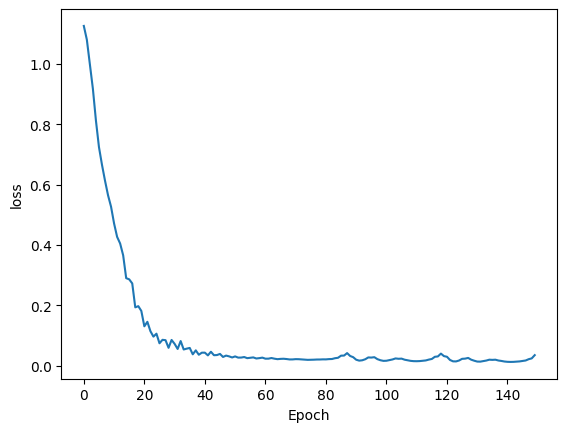

In [ ]:
plt.plot(range(epochs),losses)
plt.ylabel("loss")
plt.xlabel("Epoch")

In [ ]:
#Evaluate model
with torch.no_grad(): #stop back propagation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval,y_test)
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    print(f"{i+1}.) {y_test[i]} \t {y_val.argmax().item()}") #iris type
    #correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f"We got {correct} correct ")

1.) 2 	 2
2.) 2 	 2
3.) 2 	 2
4.) 1 	 1
5.) 2 	 2
6.) 1 	 1
7.) 2 	 2
8.) 1 	 1
9.) 2 	 2
10.) 2 	 2
11.) 2 	 1
12.) 0 	 0
13.) 0 	 0
14.) 1 	 1
15.) 0 	 0
16.) 2 	 1
17.) 0 	 0
18.) 1 	 2
19.) 0 	 0
20.) 0 	 0
21.) 1 	 1
22.) 2 	 2
23.) 0 	 0
24.) 0 	 0
25.) 1 	 1
26.) 1 	 1
27.) 1 	 1
28.) 1 	 1
29.) 0 	 0
30.) 1 	 1
We got 27 correct 


In [ ]:
new_iris = torch.tensor([4.7, 4.2, 1.3, 0.2])
with torch.no_grad():
  print(model(new_iris))

tensor([ 3.6819, -1.9609, -3.1506])


In [ ]:
torch.save(model.state_dict(), 'my_irisModel.pt')

In [ ]:
new_model = Model()
new_model.load_state_dict(torch.load('my_irisModel.pt'))

<ipython-input-23-824e07961ebb>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('my_irisModel.pt'))


<All keys matched successfully>

In [ ]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

CNN

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Convert MNIST image file into 4D tensor (# of image, height, width, color channel)
transform = transforms.ToTensor()
train_data=datasets.MNIST(root='/cnn_data', train = True, download = True, transform=transform)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 17619103.84it/s]


Extracting /cnn_data/MNIST/raw/train-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 492876.33it/s]


Extracting /cnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 4375540.24it/s]


Extracting /cnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 3614215.29it/s]

Extracting /cnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



In [ ]:
test_data=datasets.MNIST(root='/cnn_data', train = False, download = True, transform=transform)
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
#batch size
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

#Define and Describe CNN model (2 layers)
conv1 =nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)

#Grab 1 image
for i, (X_Train, y_train) in enumerate(train_data):
  break
x = X_Train.view(1,1,28,28)

#perform first convolution
x = F.relu(conv1(x))
x.shape #1 image, 6 filters, 26*26 image

#pass through pooling layer
x = F.max_pool2d(x,2,2) #kernal =2 and stride =2
x.shape #1 image, 6 filters, 13*13 image

#perform second convolution
x = F.relu(conv2(x))
x.shape #1 image, 6 filters, 11*11 image
x = F.max_pool2d(x,2,2)
x.shape #1 image, 16 filters, 5*5 image

torch.Size([1, 16, 5, 5])

Final Model Class

In [ ]:
#Model class
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    #Fully connected layer
    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)
  def forward(self,X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2)
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2)
    X =X.view(-1, 16*5*5)
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X,dim=1)
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

In [ ]:
#Loss function optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [ ]:
# Train and Test
import time
start_time = time.time()

epochs = 5 #how many times train and test
train_losses = []
test_losses = []
train_correct = []
test_correct = []

#Train
for i in range(epochs):
  trn_corr=0
  tst_corr=0

  for b,(X_train,y_train) in enumarate(train_loader):
    b+ = 1 #start the batch at 1
    y_pred = model(X_train) #get predicted values from training set
    loss = criterion(y_pred, t_train) #compare the predictions

    predicted = torch.max(y_pred.data, 1)[1]
    batch_corr = (predicted == y_train).sum() #how many we got correct
    trn_corr += batch_corr

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b%600 == 0:
      print(f"Epoch: {i} Batch: {b} Loss:{loss.item()}")
    train_losses.append(loss)
    train_correct.append(trn_corr)

#Test
  with torch.no_grad():
    for b,(X_test, y_test) in enumarate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data,1)[1]
      tst_corr += (predicted == y_test).sum()
  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


current_time = time.time()
totalTime = current_time - start_time
print(f"Training took: {totalTime/60} minutes!")